# Unit 5 - Financial Planning


In [245]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [246]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [247]:
# Set current amount of crypto assets
my_btc =1.2
my_eth = 5.3

quantity_spy = 50
quantity_agg =200

In [248]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [249]:
# Fetch current BTC price
response_data = requests.get(btc_url).json()
price_btc = response_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
response_data = requests.get(eth_url).json()
price_eth = response_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * price_btc
my_eth_value = my_eth * price_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15912.65
The current value of your 5.3 ETH is $2073.73


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [250]:
# Current amount of shares
my_spy = 50
my_agg =200

In [251]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [252]:
# Format current date as ISO format
now = pd.Timestamp("2020-10-28", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
data = alpaca.get_barset(
    tickers,
    timeframe,
    start = now,
    end= now).df

# Preview DataFrame
data

AGG                                      SPY  \
                             open     high     low   close   volume   open   
time                                                                         
2020-10-28 00:00:00-04:00  117.81  117.955  117.72  117.73  5448671  332.1   

                                                                
                               high     low   close     volume  
time                                                            
2020-10-28 00:00:00-04:00  338.2483  326.13  326.67  107939571

In [253]:
# Pick AGG and SPY close prices
agg_close_price = data["AGG"]["close"][0]
spy_close_price = data["SPY"]["close"][0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.73
Current SPY closing price: $326.67


In [254]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value= my_spy * spy_close_price
my_agg_value= my_agg * agg_close_price
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16333.50
The current value of your 200 AGG shares is $23546.00


### Savings Health Analysis

In [255]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame(
    [
        [my_btc_value + my_eth_value],
         [my_spy_value + my_agg_value],
    ],
    index =["Crypto Value", "Stock Value"],
    columns = ["amount"]
)
# Display savings DataFrame
display(df_savings)

,amount
Crypto Value,17986.379
Stock Value,39879.500


<AxesSubplot:title={'center':'HSA Savings Portfolio Composition'}, ylabel='amount'>

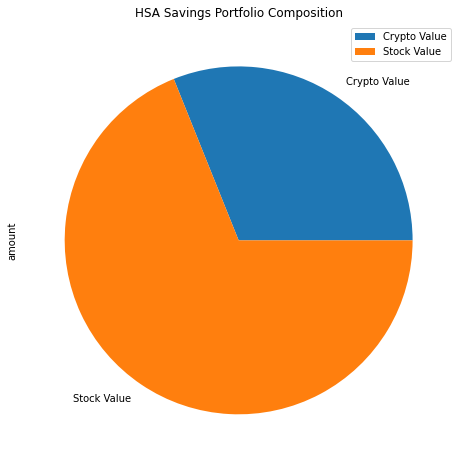

In [256]:
# Plot savings pie chart
df_savings.plot(kind = "pie", title = "HSA Savings Portfolio Composition", y = "amount", figsize =(8,8))

In [257]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["amount"]["Crypto Value"] + \
    df_savings["amount"]["Stock Value"]

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations for having enough money in thisfund! ")
elif total_savings == emergency_fund:
    print("Congratulations for reaching your financial goal.")
else:
    print(f"You are ${(emergency_fund - total_saving):0.2f} away from reaching your goal")


Congratulations for having enough money in thisfund! 


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [258]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [259]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end= end_date
).df

# Preview DataFrame
data




# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [260]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
portfolio_wights = [.4, .6]
mc = MCSimulation(
    portfolio_data = df_stock_data,
    weights =portfolio_wights,
    num_simulation = 500,
    num_trading_days = 30*252
)

In [261]:
# Printing the simulation input data
df_stock_data.head()
print(f"Monte Carlo simulation configured with {500} simulation runs and {30*252} trading days.")

Monte Carlo simulation configured with 500 simulation runs and 7560 trading days.


In [262]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991133,1.014486,0.994872,0.986921,0.999582,0.985036,0.990422,1.013919,0.996395,1.001693,...,1.007494,1.005575,0.998675,0.999345,1.012522,0.991555,1.005691,1.005395,0.999564,1.007349
2,0.983203,1.010805,1.000246,0.992496,1.017308,0.986335,0.984939,1.029046,0.998020,1.009169,...,1.001768,1.004363,1.002276,0.994031,1.003400,0.983718,1.006962,0.985457,1.009443,1.016437
3,0.979477,1.004020,1.000811,0.993149,1.020864,0.979495,1.009413,1.033511,1.007113,1.021579,...,0.999374,1.004896,0.988601,0.996258,1.005515,0.993447,1.007959,0.983015,1.007229,1.039940
4,0.967460,1.013667,1.006164,1.001303,1.021574,0.972261,1.012470,1.032257,1.014993,0.996006,...,1.011456,1.001433,0.979744,0.988432,1.012859,0.992704,1.004642,0.998001,1.004696,1.034354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.614107,4.427191,16.626392,10.798993,4.523099,6.759445,4.114963,4.710071,15.169015,6.196073,...,8.069889,4.765856,4.569198,8.967170,3.592235,8.491431,9.244870,2.364735,7.326581,13.851592
7557,2.615105,4.412872,16.623684,10.979709,4.542983,6.734994,4.112703,4.761743,15.029755,6.249157,...,8.121593,4.768470,4.543903,8.958934,3.593694,8.466148,9.127020,2.325290,7.413707,13.755325
7558,2.593205,4.400200,16.673076,11.134181,4.562063,6.662337,4.120457,4.800400,15.097773,6.186676,...,8.120578,4.819523,4.588438,8.801705,3.616971,8.432976,9.030216,2.306280,7.412738,13.640061
7559,2.623850,4.490176,16.469076,11.141121,4.539986,6.662655,4.137231,4.819527,15.047581,6.162632,...,8.123627,4.788270,4.615132,8.756565,3.599571,8.402998,9.068395,2.285340,7.526083,13.581774


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

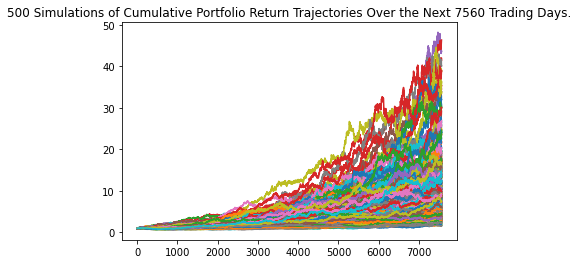

In [263]:
# Plot simulation outcomes
mc.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

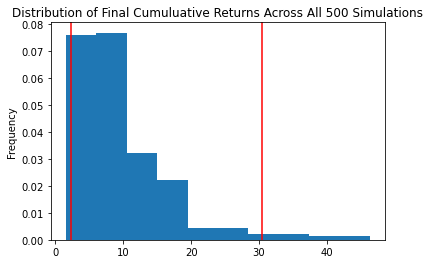

In [264]:
# Plot probability distribution and confidence intervals
mc.plot_distribution()

### Retirement Analysis

In [265]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_statistics = mc.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(summary_statistics)

count           500.000000
mean              9.713639
std               7.042734
min               1.541030
25%               4.999373
50%               7.866920
75%              12.139692
max              46.344734
95% CI Lower      2.359473
95% CI Upper     30.482155
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [266]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_statistics[8] * initial_investment, 2)
ci_upper = round(summary_statistics[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $47189.45 and $609643.1


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [267]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_statistics[8] * initial_investment, 2)
ci_upper = round(summary_statistics[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $70784.18 and $914464.65


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [268]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
portfolio_wights = [.15, .85]
mc_5_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = portfolio_wights,
    num_simulation = 500,
    num_trading_days = 5 * 252
)

In [269]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
mc_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997138,1.009175,1.003218,0.982112,1.016233,1.000747,0.986169,1.005835,1.015798,0.988909,...,1.015486,1.001999,1.002551,0.987917,0.988996,1.005012,1.006095,0.990757,0.992982,0.998132
2,0.999625,0.998511,0.990668,0.976178,1.016469,1.001757,0.993178,1.021955,1.005712,0.989341,...,1.017950,1.006137,1.012295,0.995023,0.978188,1.019773,1.011030,0.985978,1.003526,0.998693
3,1.004568,1.019664,1.001349,0.973547,1.006261,0.999356,0.989707,1.020968,1.015816,0.989738,...,1.008429,1.002038,1.004263,0.990026,0.980458,1.014509,1.026195,0.972614,0.995785,1.006439
4,0.993312,1.022526,0.990786,0.974350,1.011725,1.002991,0.986901,1.024709,1.019748,1.004108,...,1.011423,1.002659,1.003610,0.984090,0.963310,1.013702,1.035817,0.973913,0.992888,1.018138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.726460,1.380563,1.030166,0.876750,1.906578,3.626586,1.177700,0.896307,1.567211,2.098283,...,1.066476,1.557762,2.098651,1.934933,2.080350,2.087840,1.628785,2.375101,1.484422,2.622415
1257,1.740498,1.378552,1.038425,0.866687,1.903888,3.661514,1.195698,0.899915,1.616232,2.060137,...,1.057604,1.575145,2.058918,1.947353,2.043250,2.063542,1.614789,2.334244,1.458383,2.662445
1258,1.718418,1.379282,1.035621,0.857896,1.920857,3.672519,1.219285,0.899365,1.625047,2.080749,...,1.070481,1.563125,2.022435,1.941109,2.022657,2.070151,1.594522,2.325404,1.438572,2.654100
1259,1.733388,1.385269,1.030194,0.846769,1.908210,3.673579,1.220125,0.906513,1.608985,2.081473,...,1.076041,1.565695,1.994776,1.931154,2.018844,2.069948,1.583907,2.320217,1.454738,2.643890


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

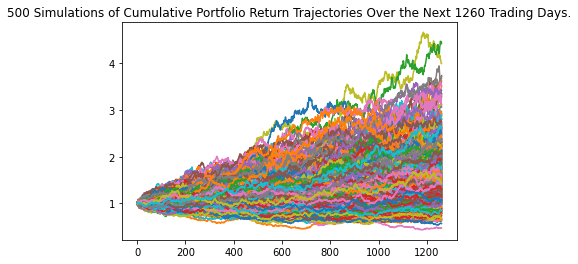

In [270]:
# Plot simulation outcomes
mc_5_years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

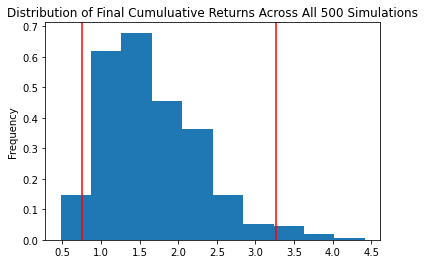

In [271]:
# Plot probability distribution and confidence intervals
mc_5_years.plot_distribution()

In [272]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_statistics_5_years = mc_5_years.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(summary_statistics_5_years)

count           500.000000
mean              1.657294
std               0.625950
min               0.474746
25%               1.189624
50%               1.529324
75%               2.046785
max               4.419321
95% CI Lower      0.755785
95% CI Upper      3.268517
Name: 1260, dtype: float64


In [273]:
# Set initial investment
# YOUR CODE HERE!
intial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(summary_statistics_5_years[8] + initial_investment, 2)
ci_upper_five = round(summary_statistics_5_years[9] + initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $30000.76 and $30003.27


### Ten Years Retirement Option

In [274]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
portfolio_wights = [.45, .55]
mc_10_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = portfolio_wights,
    num_simulation = 500,
    num_trading_days = 10 * 252
)

In [275]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
mc_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012751,1.002169,1.006100,1.009097,0.994220,0.985599,0.996074,1.010917,1.000008,1.001295,...,1.007547,1.003073,1.001537,1.004453,0.993977,0.997976,0.996662,1.000249,1.003437,0.999838
2,1.008428,1.004912,0.996889,1.011165,0.985910,0.982421,0.992197,1.018760,0.998100,1.001918,...,1.002496,1.007142,1.004649,0.995264,0.990825,0.995339,0.988214,1.012384,0.992320,1.003273
3,1.006964,0.999320,0.998394,1.017813,0.991661,0.990727,0.977609,1.028842,0.995728,1.008284,...,1.015887,1.016532,1.012251,0.999559,0.987080,0.983490,0.991484,1.010625,0.984815,0.999842
4,1.006507,1.011380,0.992014,1.019195,0.993848,0.985099,0.976881,1.032605,0.993360,1.011901,...,1.018914,1.015273,1.018075,0.996323,0.997422,0.978467,0.993741,1.012618,0.985644,1.002108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.445293,3.194218,0.953732,2.941226,1.317035,1.134538,2.370043,3.419901,2.065094,1.503167,...,1.326039,2.747791,2.038649,2.867362,1.837283,1.229301,1.555913,2.032238,0.882361,2.537596
2517,4.425880,3.219623,0.944040,2.909730,1.314194,1.129811,2.374605,3.436380,2.079246,1.509661,...,1.334531,2.749033,2.056084,2.882247,1.848762,1.231157,1.561315,2.025751,0.875824,2.565316
2518,4.389794,3.219438,0.946640,2.876984,1.305752,1.139578,2.356464,3.458639,2.104166,1.513936,...,1.325381,2.755485,2.115541,2.906934,1.835610,1.227587,1.580938,2.033348,0.873524,2.577903
2519,4.371010,3.171381,0.943899,2.858926,1.302794,1.151778,2.328989,3.424890,2.088521,1.529679,...,1.325240,2.760515,2.071044,2.905846,1.840980,1.228225,1.574726,2.009559,0.878250,2.589487


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

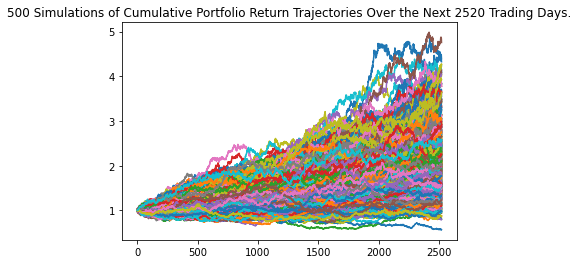

In [276]:
# Plot simulation outcomes
mc_10_years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

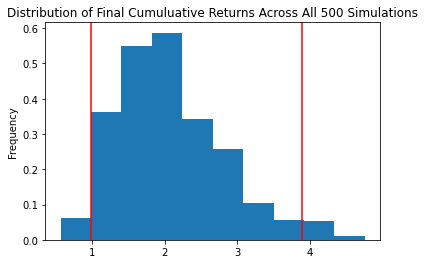

In [277]:
# Plot probability distribution and confidence intervals
mc_10_years.plot_distribution()

In [278]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics_10_years = mc_10_years.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(summary_statistics_10_years)

count           500.000000
mean              2.071144
std               0.744842
min               0.568155
25%               1.509198
50%               1.965117
75%               2.476856
max               4.756967
95% CI Lower      0.984480
95% CI Upper      3.888034
Name: 2520, dtype: float64


In [279]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(summary_statistics_10_years[8] * initial_investment, 2)
ci_upper_ten = round(summary_statistics_10_years[9] * initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $19689.61 and $77760.68
